In [1]:
import matplotlib as mpl 
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd 
import seaborn as sb
import requests as rq
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [2]:
house_amt_df = pd.read_csv("C:/Users/Sean/Desktop/Gradschool/DSC680/Project1/Historical_State_Housing_Totals.csv")

In [3]:
house_amt_df.head()

,month_date_yyyymm,state,state_id,median_listing_price,median_listing_price_mm,median_listing_price_yy,active_listing_count,active_listing_count_mm,active_listing_count_yy,median_days_on_market,...,average_listing_price,average_listing_price_mm,average_listing_price_yy,total_listing_count,total_listing_count_mm,total_listing_count_yy,pending_ratio,pending_ratio_mm,pending_ratio_yy,quality_flag
0,202302,Connecticut,CT,532000.0,0.0903,0.1202,3324.0,-0.0789,-0.0034,57.0,...,1245001.0,0.1254,0.0230,7721.0,0.0156,-0.1887,1.3271,0.2170,-0.5308,0.0
1,202302,Montana,MT,644225.0,0.0476,0.1713,2795.0,-0.0685,0.8316,110.0,...,1232821.0,0.0511,0.0415,4160.0,-0.0045,0.1837,0.5061,0.1115,-0.8042,0.0
2,202302,Michigan,MI,252450.0,0.0232,0.1002,13690.0,-0.1192,0.3510,67.0,...,375211.0,0.0335,0.0195,20193.0,-0.0464,0.1185,0.4782,0.1131,-0.3088,0.0
3,202302,Colorado,CO,592150.0,0.0210,-0.0101,11292.0,-0.0763,0.9102,74.0,...,1241378.0,0.0588,-0.0919,18563.0,0.0401,0.2244,0.6525,0.1846,-0.9326,1.0
4,202302,Georgia,GA,379150.0,-0.0020,0.0592,23765.0,-0.0605,0.7358,59.0,...,524162.0,0.0111,-0.0020,38737.0,0.0267,0.0132,0.6502,0.1629,-1.1819,1.0


In [4]:
neb_total_df = house_amt_df[house_amt_df.state_id == "NE"]

In [5]:
neb_total_df.head()

,month_date_yyyymm,state,state_id,median_listing_price,median_listing_price_mm,median_listing_price_yy,active_listing_count,active_listing_count_mm,active_listing_count_yy,median_days_on_market,...,average_listing_price,average_listing_price_mm,average_listing_price_yy,total_listing_count,total_listing_count_mm,total_listing_count_yy,pending_ratio,pending_ratio_mm,pending_ratio_yy,quality_flag
17,202302,Nebraska,NE,363883.0,0.0412,0.2170,2852.0,-0.0779,0.6197,67.0,...,405544.0,0.0424,0.1130,5232.0,0.0305,0.0543,0.8350,0.1910,-0.9844,0.0
98,202301,Nebraska,NE,349500.0,0.0279,0.2263,3093.0,-0.0780,0.6458,74.0,...,389065.0,0.0173,0.0906,5077.0,-0.0746,0.0614,0.6440,0.0071,-0.9042,0.0
131,202212,Nebraska,NE,340000.0,0.0294,0.3197,3354.0,-0.0873,0.5149,65.0,...,382453.0,0.0127,0.1150,5486.0,-0.1137,-0.0293,0.6369,-0.0451,-0.9194,0.0
162,202211,Nebraska,NE,330303.0,0.0040,0.3146,3675.0,0.0277,0.4167,49.0,...,377672.0,-0.0159,0.1255,6190.0,-0.0434,-0.0478,0.6819,-0.1310,-0.8279,0.0
244,202210,Nebraska,NE,329000.0,0.0047,0.3160,3576.0,0.0713,0.3162,46.0,...,383776.0,0.0095,0.1607,6470.0,-0.0275,-0.0635,0.8129,-0.1841,-0.7347,0.0


In [6]:
neb_total_df["month_date_yyyymm"] = neb_total_df["month_date_yyyymm"].apply(lambda x: eval(x))

C:\Users\Sean\AppData\Local\Temp/ipykernel_11076/3946049769.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  neb_total_df["month_date_yyyymm"] = neb_total_df["month_date_yyyymm"].apply(lambda x: eval(x))


In [7]:
neb_5year_df = neb_total_df.loc[(201701 <= neb_total_df["month_date_yyyymm"]) & (neb_total_df["month_date_yyyymm"] <= 202212)]

In [8]:
neb_5year_df

,month_date_yyyymm,state,state_id,median_listing_price,median_listing_price_mm,median_listing_price_yy,active_listing_count,active_listing_count_mm,active_listing_count_yy,median_days_on_market,...,average_listing_price,average_listing_price_mm,average_listing_price_yy,total_listing_count,total_listing_count_mm,total_listing_count_yy,pending_ratio,pending_ratio_mm,pending_ratio_yy,quality_flag
131,202212,Nebraska,NE,340000.0,0.0294,0.3197,3354.0,-0.0873,0.5149,65.0,...,382453.0,0.0127,0.1150,5486.0,-0.1137,-0.0293,0.6369,-0.0451,-0.9194,0.0
162,202211,Nebraska,NE,330303.0,0.0040,0.3146,3675.0,0.0277,0.4167,49.0,...,377672.0,-0.0159,0.1255,6190.0,-0.0434,-0.0478,0.6819,-0.1310,-0.8279,0.0
244,202210,Nebraska,NE,329000.0,0.0047,0.3160,3576.0,0.0713,0.3162,46.0,...,383776.0,0.0095,0.1607,6470.0,-0.0275,-0.0635,0.8129,-0.1841,-0.7347,0.0
268,202209,Nebraska,NE,327450.0,-0.0074,0.3101,3338.0,0.0163,0.2615,47.0,...,380183.0,-0.0044,0.1625,6653.0,-0.0258,-0.0610,0.9970,-0.0844,-0.6827,0.0
317,202208,Nebraska,NE,329900.0,0.0473,0.3196,3285.0,0.0974,0.2850,39.0,...,381860.0,-0.0057,0.1521,6830.0,0.0040,-0.0646,1.0814,-0.2096,-0.7724,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3549,201705,Nebraska,NE,222450.0,NaN,NaN,4280.0,NaN,NaN,50.0,...,275172.0,NaN,NaN,8231.0,NaN,NaN,0.9263,NaN,NaN,NaN
3595,201704,Nebraska,NE,215475.0,NaN,NaN,4077.0,NaN,NaN,50.0,...,270523.0,NaN,NaN,7723.0,NaN,NaN,0.8975,NaN,NaN,NaN
3670,201703,Nebraska,NE,203900.0,NaN,NaN,3976.0,NaN,NaN,56.0,...,260508.0,NaN,NaN,7036.0,NaN,NaN,0.7745,NaN,NaN,NaN
3676,201702,Nebraska,NE,197450.0,NaN,NaN,3948.0,NaN,NaN,72.0,...,254543.0,NaN,NaN,6550.0,NaN,NaN,0.6611,NaN,NaN,NaN


In [9]:
neb_5year_df = neb_5year_df[["month_date_yyyymm", "median_listing_price", "median_listing_price_mm", "active_listing_count", "active_listing_count_mm", "median_days_on_market", "median_days_on_market_mm","price_increased_count","price_increased_count_mm", "price_reduced_count", "price_reduced_count_mm", "median_listing_price_per_square_foot", "median_listing_price_per_square_foot_mm", "average_listing_price", "average_listing_price_mm"]]

In [10]:
neb_5year_df = neb_5year_df.dropna()

In [11]:
neb_5year_df['month_date_yyyymm'] = pd.to_datetime(neb_5year_df['month_date_yyyymm'], format='%Y%m')

In [12]:
neb_5year_df

,month_date_yyyymm,median_listing_price,median_listing_price_mm,active_listing_count,active_listing_count_mm,median_days_on_market,median_days_on_market_mm,price_increased_count,price_increased_count_mm,price_reduced_count,price_reduced_count_mm,median_listing_price_per_square_foot,median_listing_price_per_square_foot_mm,average_listing_price,average_listing_price_mm
131,2022-12-01,340000.0,0.0294,3354.0,-0.0873,65.0,0.3402,64.0,-0.2727,520.0,-0.4694,165.0,0.0245,382453.0,0.0127
162,2022-11-01,330303.0,0.0040,3675.0,0.0277,49.0,0.0659,88.0,0.1579,980.0,-0.1373,161.0,0.0121,377672.0,-0.0159
244,2022-10-01,329000.0,0.0047,3576.0,0.0713,46.0,-0.0215,76.0,-0.1739,1136.0,0.2241,160.0,0.0024,383776.0,0.0095
268,2022-09-01,327450.0,-0.0074,3338.0,0.0163,47.0,0.2078,92.0,1.5556,928.0,0.0087,159.0,0.0074,380183.0,-0.0044
317,2022-08-01,329900.0,0.0473,3285.0,0.0974,39.0,0.0405,36.0,-0.4375,920.0,-0.0417,158.0,0.0206,381860.0,-0.0057
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3225,2017-11-01,212225.0,0.0082,4866.0,-0.0241,58.0,0.0360,36.0,-0.3333,1168.0,-0.1424,109.0,0.0022,273066.0,0.0004
3271,2017-10-01,210500.0,-0.0209,4986.0,-0.0004,56.0,0.0472,54.0,0.1250,1362.0,-0.0620,108.0,-0.0049,272950.0,-0.0049
3343,2017-09-01,215000.0,-0.0136,4988.0,0.0182,53.0,0.0495,48.0,-0.5385,1452.0,0.1256,109.0,0.0020,274286.0,0.0005
3378,2017-08-01,217975.0,-0.0088,4899.0,0.0312,51.0,0.0306,104.0,0.5294,1290.0,-0.0198,109.0,0.0075,274158.0,-0.0058


In [13]:
neb_5year_df.index = pd.DatetimeIndex(neb_5year_df["month_date_yyyymm"])
neb_5year_df.drop("month_date_yyyymm", axis = 1, inplace=True)
neb_5year_df = neb_5year_df.sort_index(axis = 0)

In [14]:
neb_5year_temp = neb_5year_df

In [15]:
mod = sm.tsa.statespace.SARIMAX(neb_5year_temp["median_listing_price"], order = (1,0,1), seasonal_order = (3,0,1,12))
mod_fit = mod.fit()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.p

<AxesSubplot:xlabel='month_date_yyyymm'>

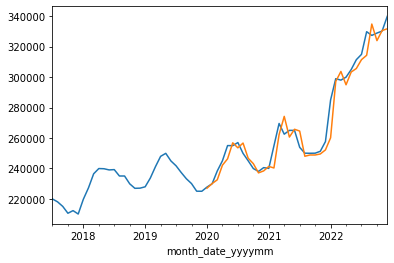

In [16]:
neb_5year_temp['median_listing_price'].plot()
mod_fit.predict(start = 30, end = 65).plot()

In [17]:
from pandas.tseries.offsets import DateOffset
pred_dates=[neb_5year_temp.index[-1]+ DateOffset(months=x)for x in range(0,60)]
pred_data=pd.DataFrame(index=pred_dates[1:],columns=['median_listing_price','forecast'])
neb_5year_temp = pd.concat([neb_5year_temp, pred_data])

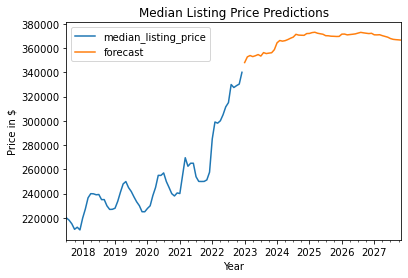

In [18]:
neb_5year_temp['forecast'] = mod_fit.predict(start = 66, end = 126, dynamic= True)
neb_5year_temp[['median_listing_price','forecast']].plot(xlabel = "Year", ylabel = "Price in $", title = "Median Listing Price Predictions")
plt.show()

In [55]:
neb_5year_temp = neb_5year_df

In [56]:
mod = sm.tsa.statespace.SARIMAX(neb_5year_temp["active_listing_count"], order = (1,0,1), seasonal_order = (3,0,1,12))
mod_fit = mod.fit()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<AxesSubplot:xlabel='month_date_yyyymm'>

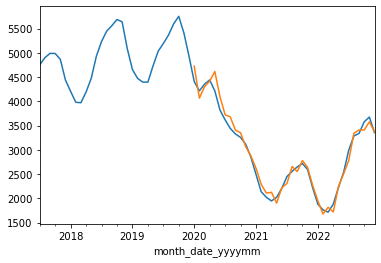

In [57]:
neb_5year_temp["active_listing_count"].plot()
mod_fit.predict(start = 30, end = 65).plot()

In [58]:
pred_dates=[neb_5year_temp.index[-1]+ DateOffset(months=x)for x in range(0,60)]
pred_data=pd.DataFrame(index=pred_dates[1:],columns=['active_listing_count','forecast'])
neb_5year_temp = pd.concat([neb_5year_temp, pred_data])

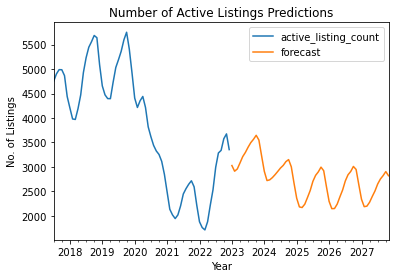

In [59]:
neb_5year_temp['forecast'] = mod_fit.predict(start = 66, end = 126, dynamic= True)
neb_5year_temp[['active_listing_count','forecast']].plot(xlabel = "Year", ylabel = "No. of Listings", title = "Number of Active Listings Predictions")
plt.show()

In [19]:
neb_5year_temp = neb_5year_df

In [20]:
mod = sm.tsa.statespace.SARIMAX(neb_5year_temp["average_listing_price"], order = (1,0,1), seasonal_order = (3,0,1,12))
mod_fit = mod.fit()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.p

<AxesSubplot:xlabel='month_date_yyyymm'>

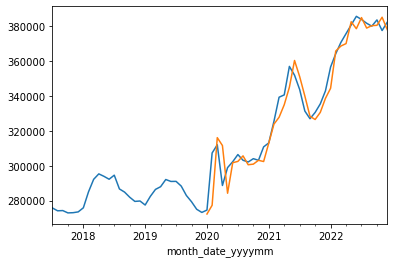

In [21]:
neb_5year_temp["average_listing_price"].plot()
mod_fit.predict(start = 30, end = 65).plot()

In [22]:
pred_dates=[neb_5year_temp.index[-1]+ DateOffset(months=x)for x in range(0,60)]
pred_data=pd.DataFrame(index=pred_dates[1:],columns=['average_listing_price','forecast'])
neb_5year_temp = pd.concat([neb_5year_temp, pred_data])

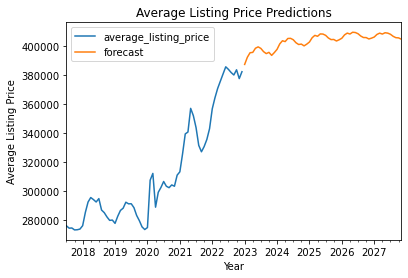

In [23]:
neb_5year_temp['forecast'] = mod_fit.predict(start = 66, end = 126, dynamic= True)
neb_5year_temp[['average_listing_price','forecast']].plot(xlabel = "Year", ylabel = "Average Listing Price", title = "Average Listing Price Predictions")
plt.show()

In [24]:
neb_5year_temp = neb_5year_df

In [25]:
mod = sm.tsa.statespace.SARIMAX(neb_5year_temp["price_reduced_count"], order = (1,0,1), seasonal_order = (3,0,1,12))
mod_fit = mod.fit()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<AxesSubplot:xlabel='month_date_yyyymm'>

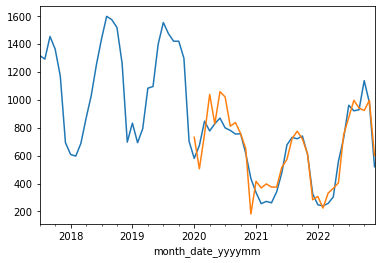

In [26]:
neb_5year_temp["price_reduced_count"].plot()
mod_fit.predict(start = 30, end = 65).plot()

In [27]:
pred_dates=[neb_5year_temp.index[-1]+ DateOffset(months=x)for x in range(0,60)]
pred_data=pd.DataFrame(index=pred_dates[1:],columns=['price_reduced_count','forecast'])
neb_5year_temp = pd.concat([neb_5year_temp, pred_data])

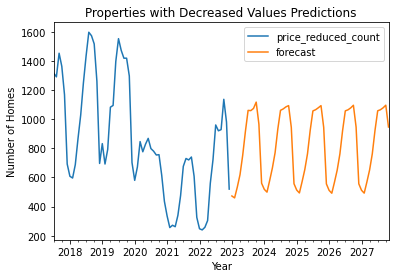

In [28]:
neb_5year_temp['forecast'] = mod_fit.predict(start = 66, end = 126, dynamic= True)
neb_5year_temp[['price_reduced_count','forecast']].plot(xlabel = "Year", ylabel = "Number of Homes", title = "Properties with Decreased Values Predictions")
plt.show()